1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

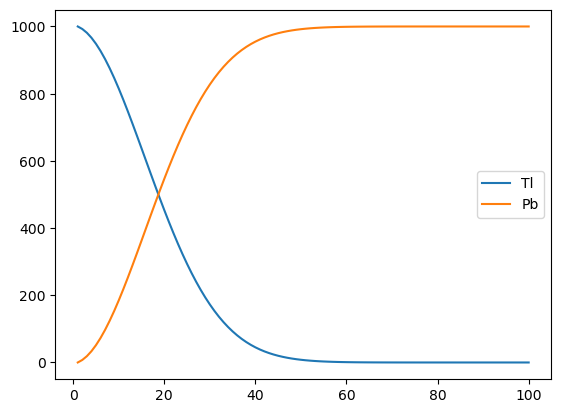

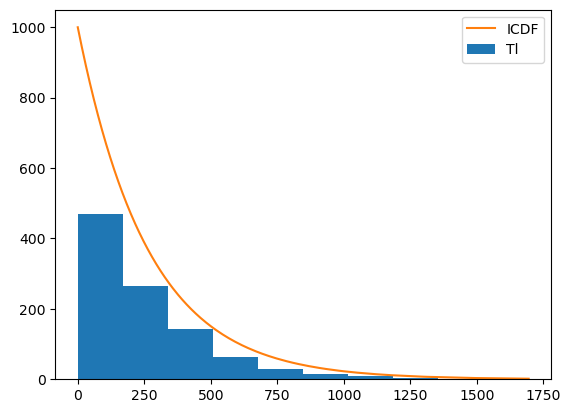

In [1]:
# DONE

import matplotlib.pyplot as plt
import numpy as np

tau = 3.052*60 # seconds
Tl = [1000]
Pb = [0]
N = 100
steps = np.linspace(1,N,N)

# point 1
def decay(t):
    p = 1-2**(-t/tau)
    return p

p_decay = decay(steps)

for i in range(1, N):
    decay_atoms = Tl[-1]*p_decay[i]
    Pb.append(Pb[-1] + decay_atoms)
    Tl.append(Tl[-1] - decay_atoms)

plt.figure()
plt.plot(steps, Tl, label = 'Tl')
plt.plot(steps, Pb, label = 'Pb')
plt.legend()

# point 2
# 1 - p = 2**(-t/tau)
# np.log(1-p) = -t/tau
# - np.log(1-p)*tau = t
def inverse_transform(p):
    return -np.log2(1-p)*tau

p_decay = np.random.random(1000)
x_inverse = inverse_transform(p_decay)
x_inverse_order = np.sort(x_inverse)
p_not_decayed = 1 - np.sort(p_decay)

plt.figure()
plt.hist(x_inverse)
plt.plot(x_inverse_order, p_not_decayed*1000)
plt.legend(["ICDF", "Tl"])

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Integral hit/miss method: 1.347804
Standard deviation hit/miss method: 0.0009309504820343754
Integral mean value method 1.346455951463717
Standard deviation value method: 0.0020697632590672937
With the mean value method we have obtained a bigger error than the hit/miss method.


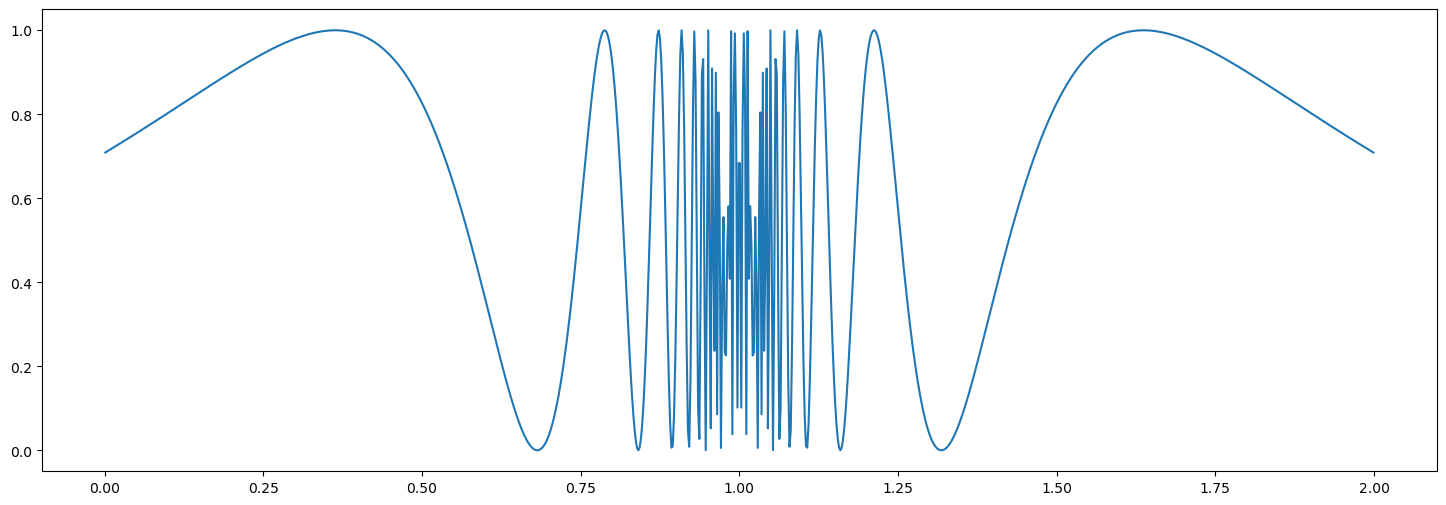

In [2]:
# DONE

def f(x):
    return np.sin(1/(1-x))**2

x=np.linspace(0.001, 1.999, 1000)
plt.figure(figsize=(18,6))
plt.plot(x, f(x))

# Monte Carlo integration
N = 100000
repeat = 5
count = 0
I = []
for r in range(repeat):
    for i in range(N):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): count += 1
    I.append(2 * count / N)
    count = 0
I_hit_miss = np.mean(I)
std_hit_miss = np.sqrt(np.var(I)/repeat)

print("Integral hit/miss method:", I_hit_miss)
print("Standard deviation hit/miss method:", std_hit_miss)

# mean value method
x_mean_value =np.linspace(0.001, 1.999, N)
I_mean_value = 2/N*np.sum(f(x_mean_value))
print("Integral mean value method", I_mean_value)
std_mean_value = 2/np.sqrt(N)*np.sqrt(np.var(f(x_mean_value)))
print("Standard deviation value method:", std_mean_value)

print("With the mean value method we have obtained a bigger error than the hit/miss method.")

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [3]:
# DONE

samples = 10000000

# Rejection method

# circle
x = np.random.uniform(0, 1, samples)
y = np.random.uniform(0, 1, samples)

r_square = x**2+y**2

inside_circle = r_square[r_square <= 1].size

area_circle = 4*inside_circle/samples

print("The area of the circle is", area_circle)

# 10D sphere
D = 10
x = np.random.rand(D, samples)
square_x = x**2

inside_sphere = np.sum(square_x, axis=0) <= 1

sphere = (2**D)*np.sum(inside_sphere)/samples

print("The 10D sphere has a volume of", sphere)

The area of the circle is 3.1409772
The 10D sphere has a volume of 2.5529344


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [4]:
# DONE

N = 100000
x = np.random.uniform(0, 1, N)**2

def f(x):
    return x**(-0.5)/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

# the integral between 0 and 1 of 1/np.sqrt(w) = 2
I = 1/N*np.sum(f(x)/w(x))*2

print("The value of the integral is:", I)

The value of the integral is: 0.8385533643952239
